In [3]:
#Imports needed for coding
from collections import Counter
import pandas as pd
import numpy as np
import math
from random import randint
import random
from IPython.display import Image

# 1. What is the time complexity of the following sorting algorithm? Explain the reasoning behind this time complexity, and then write code (pseudocode is okay) for a sorting algorithm that runs in O(nlogn) time.

This sorting algorithm is known as "insertion sort" and runs at best O(n), and at worst $O(n^2)$
This is because in the best case scenario, everything is already sorted and the algorithm needs to only check each set of numbers once. In the worst case scenario, all of the numbers are in reverse order and you have to iterate through the while loop 1 more time than the previous each time as i increases. For example, if one were to run the code on the array of numbers [4,3,2,1]: This table describes how the algorithm runs through the array each time. 

| i =  | j =  | array[j-1] | < or > | array[j] | Swap? | 0 | 1 | 2 | 3 |
|------|------|------------|--------|----------|-------|---|---|---|---|
| 0    | 0    |            |        |          | N/A   | 4 | 3 | 2 | 1 |
| 1    | 1    | 4          | >      | 3        | Yes   | 3 | 4 | 2 | 1 |
| 1    | 0    | -          | -      | -        | N/A   | - | - | - | - |
| 2    | 2    | 4          | >      | 2        | Yes   | 3 | 2 | 4 | 1 |
| 2    | 1    | 3          | >      | 1        | Yes   | 2 | 3 | 4 | 1 |
| 3    | 3    | 4          | >      | 1        | Yes   | 2 | 3 | 1 | 4 |
| 3    | 2    | 3          | >      | 1        | Yes   | 2 | 1 | 3 | 4 |
| 3    | 1    | 2          | >      | 1        | Yes   | 1 | 2 | 3 | 4 |

In this case, every time i increases by 1, the number of times you must run through the while loop increases by 1. 




## O(nlogn) time pseudocode:

For this, I am writing a pseudocode for the Heapsort algorithm, at best and worst case scenario it is O(nlogn)


    HeapSort(A)
    1. Build-MAX-HEAP(A) (MAX-HEAPIFY)
    
    #MAX-HEAPIFY is a way of organizing the array such that all "parent nodes" are greater than the "children nodes." To execute MAX-HEAPIFY, the parent closest to the bottom of the tree is compared with its children. If the child is greater than the parent, then the parent and child are swapped. This is continued up the tree at each parent node until the apex of tree is reached. Once the apex is reached, you start at bottom parent again and check that all parents are greater than children nodes. When tree is in "Maxheapify" format, continue onto next step. 
    
    2. For i <-- length[A] downto 2
    3.       do exchange A[1] <-> A[i]
    4.              heap-size[A] <-- heapsize[A]-1
    
    #Steps 2-4: Next, swap the first and last number in array (first number should be the greatest number in the array.) Then, make the heapsize 1 smaller so that the last number of the array is no longer in the heap (It will now remain untouched during the next rounds of re-organizing the array)
    
    5.              MAX-HEAPIFY(A,1)
    
    #Now, you repeat the entire process with the new, smaller by 1 heap. It will move the 2nd largest number in array to the 2nd to last position. Process is repeated iteratively until all numbers have been sorted. 
    


# 2. find the alignments that overlap the region chr17:220-300

# 3.

## 3A Given the sequences below: Calculate the observed and expected frequency of each possible 4-mer assuming each nucleotide appears at a probability of ¼

In [2]:
def allpossiblekmers(length):
    """This function takes an input length (length of your k-mer) 
    and tells you how many combinations of nucleotide bases (A,T,G,C) there are
    """
    
    allkmers = 4**(length)
    return allkmers

allpossible4mers = allpossiblekmers(4)
print(allpossible4mers)

256


## 3B Compute the frequency of all possible 4-mers in this sequence

In [3]:
def color_unexpected_red(val):
    """
    Takes a pandas array and colors it red if the observed freq is greater than 0.016129
    """
    if val > 0.0161291 :
        color = 'red'
    else:
        color = 'black'
    return 'color: %s' % color


In [4]:
def listofallkmers(len_of_kmer, sequences):
    """
    This fxn takes a sequence and returns a list of all of the k-mers that exist
    """
    kmers = []
    for j in range(0, len(sequences)):
        seq_len = len(sequences[j])
        for i in range (0, seq_len):
            kmer = sequences[j][i:i+len_of_kmer]
            if len(kmer) == len_of_kmer:
                kmers.append(kmer)
    return kmers

# test = ["AAAAAT", 'AAAAG']
# print(listofallkmers(4, test))

def freq_of_kmers(kmer_list):
    """
    This fxn takes a list of kmers and counts the number of each different kmer, then calculates its frequency 
    of occurence in the sequence. It then takes that dictionary of frequencies and turns it into a Pandas dataframe. 
    The Pandas dataframe is sorted for easy viewing. 
    """
    
    len_kmer_list = len(kmer_list)
    kmer_dict = dict(Counter(kmer_list))
    
    for key, value in kmer_dict.items():
        kmer_dict[key] = value / len_kmer_list
        
    df = pd.DataFrame.from_dict(kmer_dict, orient='index', dtype=None)
    df = df.reset_index()
    df = df.rename(index=str, columns={ 0:'Observed_Frequency', 'index':'Sequence'})
    df = df.sort_values(by = 'Observed_Frequency', ascending = False)
    df['Expected_Frequency_at_random'] = 1/62
    
    
#     df = df.style.applymap(color_unexpected_red, subset=['Observed_Frequency'])
              
    return df


In [5]:
seqs= ['AGTCGTACGTGAC', 
       'AGTAGACGTGCCG',
       'ACGTGAGATACGT',
       'GAACGGAGTACGT',
       'TCGTGACGGTGAT']
list_seqquestion3_kmers = listofallkmers(4, seqs)
freq_4mers_question3 = freq_of_kmers(list_seqquestion3_kmers)
freq_4mers_question3

,Sequence,Observed_Frequency,Expected_Frequency_at_random
9,ACGT,0.10,0.016129
15,GTGA,0.08,0.016129
25,CGTG,0.08,0.016129
17,TACG,0.06,0.016129
6,ACGG,0.04,0.016129
8,TCGT,0.04,0.016129
0,TGAC,0.04,0.016129
28,GTAC,0.04,0.016129
4,GACG,0.04,0.016129
20,AGTA,0.04,0.016129


# 4 Given a file of sequences (sequences.txt, on our course website)

## 4A Implement a simple method that scores the Hamming distance for a pattern against each subsequence

In [6]:
def hamming_distance(Dna_str, pattern):
    """
    This code computes the hamming distance for all kmers of pattern length and determines 
    the smallest hamming distance of all kmers (could be 0, but could be greater also)
    """
    len_pattern = len(pattern)
    seq_len = len(Dna_str)
    
    hamming_distances = []
    
    for i in range(0, seq_len-len(pattern)+1):
        kmer = Dna_str[i:i+len_pattern]
        diffs = 0
        for ch1, ch2 in zip(kmer, pattern):
            if ch1 != ch2:
                diffs += 1
        hamming_distances.append(diffs)
    
    return hamming_distances

print(hamming_distance('AAAAT', 'AG'))

[1, 1, 1, 1]


# 4B Use your methods to score the following patterns using simple Hamming distance.

In [87]:
def min_hamming_distance(Dna_str, pattern):
    """
    This code computes the hamming distance for all kmers of pattern length and determines 
    the smallest hamming distance of all kmers (could be 0, but could be greater also)
    """
    len_pattern = len(pattern)
    seq_len = len(Dna_str)
    
    hamming_distances = []
    
    for i in range(0, seq_len-len(pattern)+1):

        kmer = Dna_str[i:i+len_pattern]
        diffs = 0
        for ch1, ch2 in zip(kmer, pattern):
            if ch1 != ch2:
                diffs += 1
        hamming_distances.append(diffs)
        print(hamming_distances)
    lowest_hamming_distance = min(float(s) for s in hamming_distances)
    
    return lowest_hamming_distance


print(min_hamming_distance(('AAATGGA'), 'AAA'))
# print(min_hamming_distance(('AAAG'), 'AAAT'))
# test_seq = 'ATGCGGCGA'
# test_pattern = 'ATCG'
# testing = min_hamming_distance(test_seq, test_pattern)
# testing

[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 2]
0.0


In [8]:
def sum_hamming_distances(all_sequences, pattern):
    total_hamming_sum = 0
    for seq in all_sequences:
        min_hamming = min_hamming_distance(seq, pattern)
        total_hamming_sum += min_hamming
    return total_hamming_sum

#Importing the sequences.txt
sequences = (open('atom_sequences', 'r').read().split('\n'))
patterns = ('TTGTAGG', 'GAGGACC', 'TATACGG', 'CCGCAGG', 'CAGCAGG')

pattern_hd = []
for p in patterns:
    pattern_hd.append(sum_hamming_distances(sequences, p))
print(pattern_hd)

d = { 'Hamming_distance_sums' : pd.Series(pattern_hd),'pattern': pd.Series(patterns)}
hd_df = pd.DataFrame(d)
hd_df
        
#implanted motif... sum up the hamming distances
#Per long sequence, take the kmer that has the lowest hamming distance
#Sum up the t(min_Hamming_distance) for all of the sequences. This is the total score of a 
#pattern with respect to a set of sequences. 
#Compare all of the patterns hamming distances scores and the one with the lowest value is
#the "implanted sequence"
        

[40.0, 43.0, 44.0, 28.0, 11.0]


,Hamming_distance_sums,pattern
0,40.0,TTGTAGG
1,43.0,GAGGACC
2,44.0,TATACGG
3,28.0,CCGCAGG
4,11.0,CAGCAGG


Find motif with smallest hamming distance
Find subseq that gives lowest hamming distance for the implanted motif, 
make pwm from those subsequences
use pwm to calc entropy. 

In [101]:
def min_hamming_sequences(sequences, pattern):
    '''
    This function allows you to find the sequences that yeild the lowest hamming distances for a specific pattern
    '''
    len_pattern = len(pattern)
    min_hamming_seqs = []
    for seq in sequences:
        seq_len = len(seq)
        hamming_distances = []
        for i in range(0, seq_len-len(pattern)+1):
            kmer = seq[i:i+len_pattern]
            diffs = 0
            for ch1, ch2 in zip(kmer, pattern):
                if ch1 != ch2:
                    diffs += 1
            hamming_distances.append((kmer, diffs))
            
        min_seq = min(x[:] for x in hamming_distances)
        min_hamming_seqs.append(min_seq[0])
    return min_hamming_seqs

# print(min_hamming_sequences(('AAATGGA', 'AAGATA'), 'AAA'))

In [105]:
smallest_hamming_motifs = min_hamming_sequences(sequences,'CAGCAGG')
pwm_smallest_hamming_motifs = profile_weighted_matrix(smallest_hamming_motifs, 7)
print(pwm_smallest_hamming_motifs)

def entropy(pwm):
    

4
[[ 0.89655172  0.89655172  0.79310345  0.34482759  0.24137931  0.20689655
   0.17241379]
 [ 0.03448276  0.03448276  0.06896552  0.31034483  0.37931034  0.27586207
   0.44827586]
 [ 0.03448276  0.03448276  0.10344828  0.13793103  0.17241379  0.27586207
   0.20689655]
 [ 0.03448276  0.03448276  0.03448276  0.20689655  0.20689655  0.24137931
   0.17241379]]


In [125]:
#Entropy calculation workflow
test = np.array([[0,.2,.3], [.1,.2,.3]])
log2stuff = np.log2(test)
multbothtogether = np.multiply(test, log2stuff)
multbothtogether = np.multiply(multbothtogether, -1)
getridofnan = np.nan_to_num(multbothtogether)
print(getridofnan)
[sum(x) for x in zip(*getridofnan)]

def entropy(pwm):
    '''
    This function takes a PWM and calculates the entropy:
    Step 1: Multiply each element of the array by log2
    Step 2: Multiply the above array by the original PWM array (this way you get p_i(log_2(p_i)))
    Step 3: Get rid of the nan's (these occur when you have a probability of 0)
    Step 4: Muliply everything by -1 
    Step 5: Compute the average entropy of all entropies. 
    '''
    pwm_step1 = np.log2(pwm)
    pwm_step2 = np.multiply(pwm, pwm_step1)
    pwm_step3 = np.multiply(pwm_step2, -1)
    pwm_step4 = np.nan_to_num(pwm_step3)
    pwm_step5 = [sum(x) for x in zip(*pwm_step4)]
    average_entropy = np.mean(pwm_step5)
    return average_entropy



[[ 0.          0.46438562  0.52108968]
 [ 0.33219281  0.46438562  0.52108968]]


[0.33219280948873625, 0.92877123795494487, 1.0421793564997237]

# 5. What is the probability that you will select the correct motif using a randomized search algorithm? How many permutations would you need on average to be likely to approach a correct solution using a randomized search algorithm?

The probability that you select the correct motif is dependent upon the sequence content, and the length of the kmer. For example, if you have 1000 sequences of 'A' repeating, and you are looking for a kmer, you will always be able to find the it on the first try every time. However, this is not realistic, and in reality you will have all 4 base pairs relatively evenly distributed and it will take much longer to converge on a solution. 
On average, you need to run the search algorithm an infinite number of times to be sure that you have converged.

# 6. Now we will ask you to implement a randomized motif search. Using the file sequences.txt given in problem 5, find the motif using a randomized motif search. What profile matrix is obtained by running the algorithm once? 10 times? 1000 times?

In [39]:
def profile_matrix(kmers, len_kmer):
    '''s
    Fxn takes a set of kmers and calculates a profile matrix (unweighted.) Pseudocounts have been added. 
    Structure of matrix count: 
    [Row 1: A counts
     Row 2: C counts
     Row 3: G counts
     Row 4: T counts]
    '''
    pm = np.ones((4, len_kmer))
    for seq in kmers:
        for i in range(len_kmer):
            if seq[i] == 'A':
                pm[0, i] += 1 
            elif seq[i] == 'C':
                pm[1, i] += 1
            elif seq[i] == 'G':
                 pm[2, i] += 1
            elif seq[i] == 'T':
                 pm[3, i] += 1             
    return pm 


print((profile_matrix(('AAG', 'AAT'), 3)))

[[ 3.  3.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  2.]
 [ 1.  1.  2.]]


In [40]:
def profile_weighted_matrix(kmers, kmer_len):
    '''
    Fxn takes a set of kmers and calculates a profile weighted matrix (unweighted.) Pseudocounts have been added. 
    Structure of matrix count: 
    [Row 1: A counts
     Row 2: C counts
     Row 3: G counts
     Row 4: T counts]
    '''
    
    pm = np.ones((4, kmer_len))
    for seq in kmers:
        for i in range(kmer_len):
            if seq[i] == 'A':
                pm[0, i] += 1 
            elif seq[i] == 'C':
                pm[1, i] += 1
            elif seq[i] == 'G':
                 pm[2, i] += 1
            elif seq[i] == 'T':
                 pm[3, i] += 1   
                    
    len_kmers = len(kmers)
    pwm = pm/(len_kmers+4)
    return pwm

print((profile_weighted_matrix(('AAG', 'AAT'), 3)))

[[ 0.5         0.5         0.16666667]
 [ 0.16666667  0.16666667  0.16666667]
 [ 0.16666667  0.16666667  0.33333333]
 [ 0.16666667  0.16666667  0.33333333]]


In [45]:
#Making a random seed so I can compare my results during development
# random.seed(a= 5)

def select_random_kmers(sequences, kmer_len):
    #Randomly select a kmer from each sequence and put into a list
    kmers = []
    for seq in sequences:
        kmer = []
        #To ensure I always get kmers of the length we want (and don't get short kmers that run off the sequence)
        while len(kmer) != kmer_len:
            rand_int = randint(0, len(seq))
            kmer = seq[rand_int: rand_int+kmer_len]
            if len(kmer) == kmer_len:
                kmers.append(kmer)
    return kmers

test = ('testinghellothisisatest', 'testingyupyup', 'testingyipyip')
print(select_random_kmers(test, 4))
        
        
    #Use these kmers to calculate a PWM
    #Take each sequence and compute the kmer with the highest score using PWM.
    #Note: Compute a 2 scores, compare the two and keep the higher score. 

['esti', 'ingy', 'test']


Question for below code: how do I get it to loop? Also, how do you determine if the score is lower than the beginning score? Is it that all scores have to be less than the previous ones? Or just one of them?

In [1]:
def randomized_motif_search(sequences, kmer_len):
    #Randomly select kmers in each sequence
    random_kmers = select_random_kmers(sequences, kmer_len)
    #Calculate the PWM of those kmers
    pwm = profile_weighted_matrix(random_kmers, kmer_len)
    best_motifs = random_kmers
    
    #Calculate the score of each subsequence using the initial_pwm
    new_kmers = []
    for seq in sequences:
        #Run through each possible subsequence of a sequence
        scores_and_subseqs = []
        for i in range (0, len(seq)):
            subseq = seq[i:i+kmer_len]
            
            #Make sure the subseq is long enough (just ensuring end of sequence isn't tried as subseq)
            if len(subseq) == kmer_len:  
                
                #Calculate the score for each subsequence
                #Starting score at 1 beacause you can't multiply by 0. 
                score = 1
                for j in range(0,kmer_len):
                    if subseq[j] == 'A':
                        score = pwm[0,j]*score
                    elif subseq[j] == 'C':
                        score = pwm[1,j]*score
                    elif subseq[j] == 'G':
                        score = pwm[2,j]*score
                    elif subseq[j] == 'T':
                        score = pwm[3,j]*score
                #make a list of lists that combine all of the 
                scores_and_subseqs.append((subseq, score))
        new_kmer = max(scores_and_subseqs)
        new_kmer = new_kmer[0]
        new_kmers.append(new_kmer)
        
        #I am not sure how to get this to loop
#         while score_motifs < score_best_motifs:     
    return new_kmers

print(randomized_motif_search(test, 4))


NameError: name 'test' is not defined

In [ ]:
def motifs(current_pwm, sequences, kmer_len):
    

In [80]:
#noodling with this code
#As of 20170131 11:58, this code is closer than the above code to working. What is lacks is the 
#ability to take the new PWM and multiply everything by the 
def noodling_randomized_motif_search(sequences, kmer_len):
    #Randomly select kmers in each sequence
    random_kmers = select_random_kmers(sequences, kmer_len)
    #Calculate the PWM of those kmers
    start_pwm = profile_weighted_matrix(random_kmers, kmer_len)
    print(pwm)
    best_motifs = random_kmers
    new_pwm = np.zeros((4, kmer_len))
    
    #Calculate the score of each subsequence using the initial_pwm
    while pwm.all() > new_pwm.all():
        new_kmers = []
        for seq in sequences:
            #Run through each possible subsequence of a sequence
            scores_and_subseqs = []
            for i in range (0, len(seq)):
                subseq = seq[i:i+kmer_len]

                #Make sure the subseq is long enough (just ensuring end of sequence isn't tried as subseq)
                if len(subseq) == kmer_len:  

                    #Calculate the score for each subsequence
                    #Starting score at 1 beacause you can't multiply by 0. 
                    score = 1
                    for j in range(0,kmer_len):
                        if subseq[j] == 'A':
                            score = pwm[0,j]*score
                        elif subseq[j] == 'C':
                            score = pwm[1,j]*score
                        elif subseq[j] == 'G':
                            score = pwm[2,j]*score
                        elif subseq[j] == 'T':
                            score = pwm[3,j]*score
                    #make a list of lists that combine all of the 
                    scores_and_subseqs.append((subseq, score))
                new_kmer = max(scores_and_subseqs)
                new_kmer = new_kmer[0]
                new_kmers.append(new_kmer)
            new_pwm = profile_weighted_matrix(new_kmers, kmer_len)
            print(new_kmers)
            print(new_pwm)
        else: 
            return new_kmers, new_pwm
           
    return
test = ('AAT', 'TTA', 'ATC')
print(noodling_randomized_motif_search(test, 1))


[[ 0.28571429]
 [ 0.28571429]
 [ 0.14285714]
 [ 0.28571429]]
['A', 'A', 'T']
[[ 0.42857143]
 [ 0.14285714]
 [ 0.14285714]
 [ 0.28571429]]
['A', 'A', 'T', 'T', 'T', 'T']
[[ 0.3]
 [ 0.1]
 [ 0.1]
 [ 0.5]]
['A', 'A', 'T', 'T', 'T', 'T', 'A', 'T', 'T']
[[ 0.30769231]
 [ 0.07692308]
 [ 0.07692308]
 [ 0.53846154]]
(['A', 'A', 'T', 'T', 'T', 'T', 'A', 'T', 'T'], array([[ 0.30769231],
       [ 0.07692308],
       [ 0.07692308],
       [ 0.53846154]]))


# 7. Continue using the file sequences.txt given in problem 5, identify the motif in the sequences using the Gibbs Sampling approach. Did you arrive at the same motif as problem 7, why?

# 8. In Southern California, Mount San Gorgonio is the highest peak, which doesn’t have a lot of trees on top of it. Build a suffix trie and suffix tree for gorgonio, by hand.

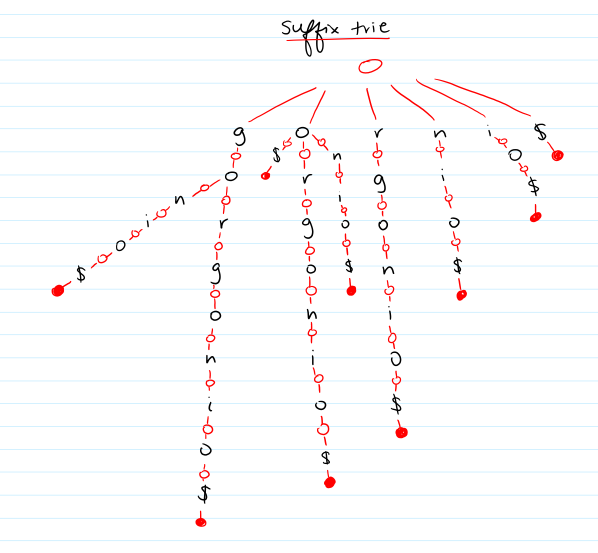

In [21]:
Image("suffix_trie.png")

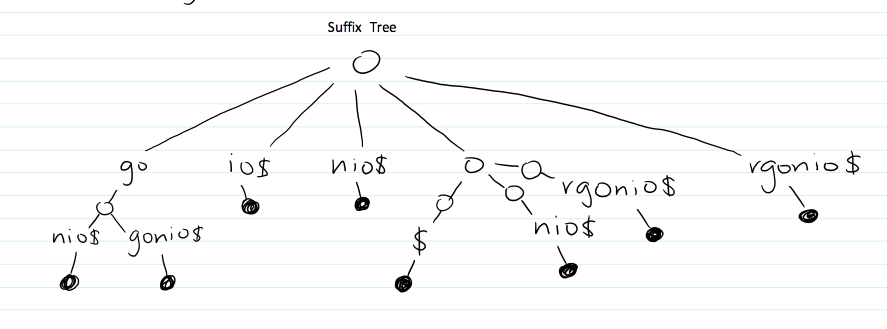

In [23]:
Image('suffix_tree.png')

# 9
## 9A In any language of your choice, create a suffix array for Gorgonio and print out the results (index, element) of your array in ascending order.

In [13]:
#New idea: Construct a Panda dataframe which each index is connected with a word and as the index increases, 
#the number of letters is decreased by one. 
#Note, I am not entirely sure if Pandas is the way to store this data. But it worked to build the array I think

#This is too much memory. You need to store the positions of the suffixes and then when you are querying just slice 
#the actual sequence twice from your stored positions (left and right and center sequences)
def build_suffix_array(string):
    """
    This function takes a string and converts it into a sorted pandas dataframe. 
    
    """
    SA_array = []
    for i in range(0, len(string)): 
        SA_array.append(string[i:])
    df_SA = pd.DataFrame(SA_array)
    df_SA.index = df_SA.index + 1
    df_SA = df_SA.rename(index=str, columns={ 0:'Element'})
    df_SA = df_SA.sort_values(by = 'Element', ascending = True)
    
    return df_SA

test = "Gorgonio$"
testy = build_suffix_array(test)
print(testy)

#Alternatively to build SA: 
t ='abaaba$'
suffixes = sorted([t[i:] for i in range(len(t))])

     Element
9          $
1  Gorgonio$
4     gonio$
7        io$
6       nio$
8         o$
5      onio$
2   orgonio$
3    rgonio$


## 9B Next, implement a “Query” method for your suffix array using the binary search method. Please include your well-documented code in your submission.

In [6]:
#This code works. Worked on it with Kevin 
def build_suffix_array(t):
    SA = sorted([(t[i:], i) for i in range(0, len(t))])
#     SA = [item[1] for item in SA]
    return SA

def binarysearchSA(data, query):
    #Set left and right boundaries
    suffixes = sorted([data[i:] for i in range(len(data))])
    print(suffixes)
    n = len(query)
    left, right = 0, (len(suffixes)-1)
    
    indices = []
    while left <= right: 
        middle = math.floor((left+right) / 2)
        if suffixes[middle][0].startswith(query):
            indices += suffixes[middle][1]
            above_index = middle -1 
            below_index = middle +1
            while suffixes[above_index][0].startswith(query):
                indices += suffixes[above_index][1]
                above_index = above_index -1
            while suffixes[below_index][0].startswith(query):
                indices += suffixes[below_index][1]
                below_index = below_index +1   
            return tuple(sorted(indices))
        
        elif suffixes[middle] > query:
            #Change the right boundary
            right = middle - 1 
        else: 
            #Change the left boundary
            left = middle + 1 
    else:
        print('The query does not exist in the sequence')
    return

# build_suffix_array('gorgonio$')
testing = binarysearchSA('Gorgonio$', 'o')
print(testing)
    

    

['$', 'Gorgonio$', 'gonio$', 'io$', 'nio$', 'o$', 'onio$', 'orgonio$', 'rgonio$']
('$', 'n', 'r')


In [15]:
#noodling with this code
def binarysearchSA(data, query):
    #Set left and right boundaries
    suffixes = sorted([data[i:] for i in range(len(data))])
    print(suffixes)
    n = len(query)
    left, right = 0, (len(suffixes)-1)
    
    while left <= right: 
        middle = math.floor((left+right) / 2)
        if suffixes[middle].startswith(query):
            return ('We found your query in the sequence!', middle )
            break
        elif suffixes[middle] > query:
            #Change the right boundary
            right = middle - 1 
        else: 
            #Change the left boundary
            left = middle + 1 
    else:
        print('The query does not exist in the sequence')
    return 


# testing = binarysearchSA('Gorgonio$', 'io')
# print(testing)
        
chr1 = (open('chr1', 'r').read())
# chr1_1st_seq = binarysearchSA(chr1, 'atattaacaaagccaaaagtttcaaacttt')
    

# 9 ----------- Using stored positions


In [ ]:
def build_suffix_array(t):
    SA = sorted([(t[i:], i) for i in range(0, len(t))])
#     SA = [item[1] for item in SA]
    return SA

# trying = 'Gorgonio$'
# build_suffix_array(trying)
chr1 = (open('chr1', 'r').read())
# chr1_SA = build_suffix_array(chr1)
# print(chr1_SA)

In [128]:
def binarysearchSA(t, p):
    '''
    t = Sequence 
    p = query sequence or pattern you are looking for
    sa = suffix array (holds the indices of the sequence that have been sorted)
    '''
    sa = build_suffix_array(t)
    print(sa)
    #Begin by setting the initial left and right positions
    l, r = 0, (len(sa))
    
    while l <= r: 
        #Set the center position
        c = math.floor((l+r) / 2)
        
        #Assume that p < t[sa[c]]
        plt = True
        
        i = 0
        #while i is less than length of pattern and the center sequence+ i is less than the length of the total sequence
        while i < len(p) and sa[c]+i < len(t):
            if p[i] < t[sa[c]+i]:
                break # p < T[sa[c]:]
            elif p[i] > t[sa[c]+i]:
                plt = False
                break # p > T[sa[c]:]
            i += 1 # tied so far
        if plt:
            if c == l + 1: return c
            r = c
        else:
            if c == r - 1: return r
            l = c

    return 


print(binarysearchSA('AAAATACTACATAC', 'TAC'))
seq = 'AAAATACTAC'
# print(sorted([(seq[i:], i) for i in range(0, len(seq))]))        
    

[0, 1, 2, 12, 8, 5, 10, 3, 13, 9, 6, 11, 7, 4]
11
[('AAAATACTAC', 0), ('AAATACTAC', 1), ('AATACTAC', 2), ('AC', 8), ('ACTAC', 5), ('ATACTAC', 3), ('C', 9), ('CTAC', 6), ('TAC', 7), ('TACTAC', 4)]


# 10. When searching for a motif using k-mer enumeration, what’s the rationale for using the entropy metric rather than a simple difference score? Provide a simple example that illustrate this.

With a consensus sequence, you lose a lot of information about the sequences (is a position really conserved or is there just a nucleotide that barely predominates? Are there more than one base that are roughly the same frequency?)
In contrast, the entropy metric gives you the information that the consensus sequence does... and more! 

Entropy metric allows you to weight postions that have been conserved. 

In [10]:
chr1 = (open('chr1', 'r').read())
chr1.find('aaaattat')

33625